In [165]:
import pandas as pd

df = pd.read_csv('dataset.csv')

In [166]:
df.head()

,stock_symbol,date,open,high,low,close,adj_close,volume
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45088 entries, 0 to 45087
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stock_symbol  45088 non-null  object 
 1   date          45088 non-null  object 
 2   open          45088 non-null  float64
 3   high          45088 non-null  float64
 4   low           45088 non-null  float64
 5   close         45088 non-null  float64
 6   adj_close     45088 non-null  float64
 7   volume        45088 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 2.8+ MB


In [168]:
df.isna().sum()

stock_symbol    0
date            0
open            0
high            0
low             0
close           0
adj_close       0
volume          0
dtype: int64

In [169]:
from datetime import datetime

df['date_unix'] = df['date'].apply(lambda x: int(datetime.strptime(x, '%Y-%m-%d').timestamp()))

In [170]:
df.drop(columns=['date'], inplace=True)

In [171]:
df.drop(columns=['date_unix'])

,stock_symbol,open,high,low,close,adj_close,volume
0,AAPL,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
1,AAPL,7.664286,7.699643,7.616071,7.656429,6.526476,601904800
2,AAPL,7.656429,7.686786,7.526786,7.534643,6.422664,552160000
3,AAPL,7.562500,7.571429,7.466071,7.520714,6.410790,477131200
4,AAPL,7.510714,7.571429,7.466429,7.570714,6.453412,447610800
...,...,...,...,...,...,...,...
45083,TSLA,136.000000,136.630005,122.260002,125.349998,125.349998,210090300
45084,TSLA,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
45085,TSLA,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
45086,TSLA,110.349998,116.269997,108.239998,112.709999,112.709999,221070500


In [172]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['stock_symbol'] = encoder.fit_transform(df['stock_symbol'])

In [173]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df)

t = scaler.transform(df)

df = pd.DataFrame(t, columns=df.columns)

In [174]:
df

,stock_symbol,open,high,low,close,adj_close,volume,date_unix
0,-1.597905,-0.803379,-0.803002,-0.804278,-0.803491,-0.779192,4.726747,-1.770580
1,-1.597905,-0.802968,-0.802624,-0.803967,-0.803361,-0.779081,5.886849,-1.769843
2,-1.597905,-0.803045,-0.802748,-0.804859,-0.804560,-0.780109,5.353371,-1.769106
3,-1.597905,-0.803970,-0.803868,-0.805466,-0.804697,-0.780226,4.548741,-1.768370
4,-1.597905,-0.804479,-0.803868,-0.805462,-0.804205,-0.779804,4.232155,-1.767633
...,...,...,...,...,...,...,...,...
45083,1.616264,0.459858,0.449128,0.341060,0.355134,0.397450,1.684917,1.717323
45084,1.616264,0.365098,0.371361,0.328675,0.333479,0.375666,1.222693,1.718059
45085,1.616264,0.277817,0.284468,0.206226,0.195180,0.236550,1.669400,1.721006
45086,1.616264,0.207461,0.251458,0.201033,0.230714,0.272295,1.802671,1.721742


In [175]:
import seaborn as sns


<Axes: >

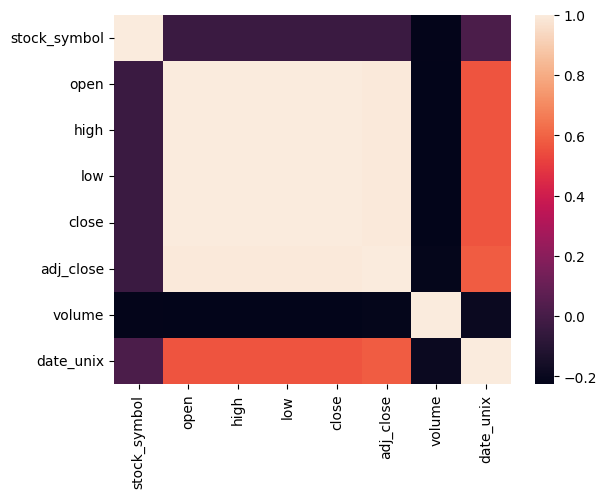

In [176]:
sns.heatmap(df.corr())


In [177]:
X = df.drop(columns=['volume'])

Y = df['volume']

In [178]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=.2)

X_train, X_test, Y_train, Y_test

(       stock_symbol      open      high       low     close  adj_close  \
 32749      0.874533 -0.782431 -0.782454 -0.786221 -0.786142  -0.750572   
 8343      -1.103417 -0.458683 -0.462411 -0.456052 -0.458869  -0.421364   
 5960      -1.350661  3.784898  3.816703  3.739071  3.840750   3.903668   
 26890      0.380045 -0.083311 -0.073396 -0.073029 -0.067243  -0.027423   
 3853      -1.350661 -0.557207 -0.554368 -0.555834 -0.552617  -0.515666   
 ...             ...       ...       ...       ...       ...        ...   
 11284     -0.856174 -0.106829 -0.105727 -0.102992 -0.103958  -0.064356   
 44732      1.616264  1.479940  1.461297  1.453788  1.450006   1.498793   
 38158      1.121777  0.438111  0.424080  0.425406  0.427679   0.468050   
 860       -1.597905 -0.721770 -0.721094 -0.721762 -0.722249  -0.706649   
 15795     -0.608930 -0.483308 -0.486795 -0.483323 -0.486470  -0.474981   
 
        date_unix  
 32749  -1.108357  
 8343    0.154212  
 5960    1.102980  
 26890  -0.357740 

In [179]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, Y_train)


LinearRegression()

In [180]:
Y_pred = model.predict(X_test)

In [181]:
from sklearn.metrics import r2_score

r2_score(y_pred=Y_pred, y_true=Y_test)

0.14054078133916414